### 

In [6]:
import numpy as np

a = np.array([
    [0, 1, 2, 1, 0],
    [3, 4, 5, 4, 3],
    [6, 7, 8, 7, 6],
    [3, 4, 5, 4, 4],
    [0, 1, 2, 1, 0]
])
b = np.array([1, 2, 3, 4, 5])

c = np.empty((5, 5))

# 結果を格納する配列を先に作る
### timeitで計測

In [7]:
%%timeit
for i in range(a.shape[0]):
    c[i, :] = a[i, :] + b

The slowest run took 4.46 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 9.82 µs per loop


### 

In [8]:
c

array([[  1.,   3.,   5.,   5.,   5.],
       [  4.,   6.,   8.,   8.,   8.],
       [  7.,   9.,  11.,  11.,  11.],
       [  4.,   6.,   8.,   8.,   9.],
       [  1.,   3.,   5.,   5.,   5.]])

### 8.9. NumPy を用いた重回帰分析

In [9]:
# Xの定義
X = np.array([
    [2, 3],
    [2, 5],
    [3, 4],
    [5, 9],
])

X

array([[2, 3],
       [2, 5],
       [3, 4],
       [5, 9]])

In [10]:
# データ数（X.shape[0]) と同じ数だけ 1 が並んだ配列
ones = np.ones((X.shape[0], 1))

# concatenate を使い、1 次元目に 1 を付け加える
X = np.concatenate((ones, X), axis=1)

# 先頭に 1 が付け加わったデザイン行列
X


array([[ 1.,  2.,  3.],
       [ 1.,  2.,  5.],
       [ 1.,  3.,  4.],
       [ 1.,  5.,  9.]])

### また、目標値が以下で与えられたとします。

In [11]:
# t の定義
t = np.array([1, 5, 6, 8])

t

array([1, 5, 6, 8])

### 重回帰分析は、正規方程式を解くことで最適な 1 次方程式の重みを決定することができました。 正規方程式の解は以下のようなものでした。
### todo 数式の書き方を調べる

これを、4 つのステップに分けて計算していきます。

まずは、XTX の計算です。ndarrayに対して .T で転置した配列を得られます。



In [12]:
# Step 1
xx = np.dot(X.T, X)

xx


array([[   4.,   12.,   21.],
       [  12.,   42.,   73.],
       [  21.,   73.,  131.]])

### 次に、この逆行列を計算します。

In [13]:
# Step 2
xx_inv = np.linalg.inv(xx)

xx_inv


array([[ 1.76530612, -0.39795918, -0.06122449],
       [-0.39795918,  0.84693878, -0.40816327],
       [-0.06122449, -0.40816327,  0.24489796]])

逆行列の計算は np.linalg.inv() で行うことができます。

次に、XTt の計算をします。



In [14]:
# Step 3
xt = np.dot(X.T, t)

xt

array([  20.,   70.,  124.])

最後に、求めた xx_inv と xt を掛け合わせます。



In [15]:
# Step 4
w = np.dot(xx_inv, xt)

w

array([-0.14285714,  0.71428571,  0.57142857])

実際には逆行列を陽に求めることは稀で、連立一次方程式を解く、すなわち逆行列を計算してベクトルに掛けるのに等しい計算をひとまとめに行う関数 numpy.linalg.solve を呼ぶ方が速度面でも精度面でも有利です。

In [16]:
w_ = np.linalg.solve(X.T.dot(X), X.T.dot(t))

w_

array([-0.14285714,  0.71428571,  0.57142857])

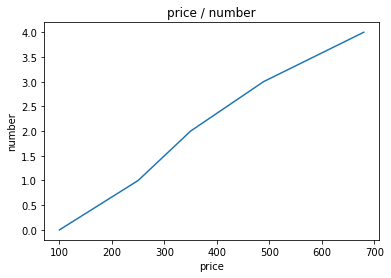

In [17]:
% matplotlib inline
import matplotlib.pyplot as plt

price = [100, 250, 350, 489, 680]
number = [ x for x in range(5) ]

# wirte graph
plt.plot(price, number)

# graph title
plt.title("price / number")

# x lable
plt.xlabel("price")

# y label
plt.ylabel("number")

# draw
plt.show()


## Pandas DataFrame
[[https://dev.classmethod.jp/server-side/python/visual-studio-code-jupyter-notebook/]]
* pandras datafeme
* Irisdata

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028741F59780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000287420BA6A0>]], dtype=object)

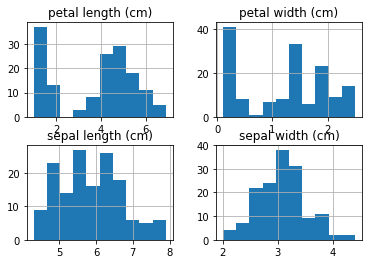

In [18]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df

df.hist()

In [19]:
%%time
for i in range(10000000):
    continue
print('done')

done
Wall time: 471 ms


### 行列積
* dot()

In [37]:
# 行列 A の定義
A = np.array([
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8]
])

# 行列 B の定義
B = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])
# 行列積の計算
C = np.dot(A,B)

print(C)

# or
D = A.dot(B)

print(D)

print(C.dtype)

print(D.dtype)


[[ 18  21  24]
 [ 54  66  78]
 [ 90 111 132]]
[[ 18  21  24]
 [ 54  66  78]
 [ 90 111 132]]
int32
int32


## 基本的な統計量の求め方

In [38]:
x = np.random.randint(0, 10, (8, 10))
x


array([[2, 4, 8, 7, 3, 2, 8, 7, 9, 9],
       [7, 8, 1, 3, 1, 1, 0, 6, 2, 4],
       [4, 0, 2, 1, 7, 9, 4, 1, 0, 5],
       [3, 4, 0, 2, 3, 0, 3, 4, 8, 4],
       [4, 6, 0, 4, 6, 3, 3, 8, 4, 8],
       [4, 4, 7, 6, 7, 4, 3, 5, 8, 1],
       [1, 8, 2, 1, 4, 7, 9, 1, 5, 8],
       [4, 6, 5, 6, 3, 5, 9, 1, 4, 6]])

In [39]:
# 平均値
x.mean()

4.3250000000000002

In [40]:
# 分散値
x.var()

7.1943749999999991

In [41]:
# 標準偏差
x.std()

2.6822332113371496

In [42]:
# 最大
x.max()

9

In [43]:
# 最小
x.min()

0

In [44]:
# 計算する軸を指定
x.mean(axis=1)

array([ 5.9,  3.3,  3.3,  3.1,  4.6,  4.9,  4.6,  4.9])

In [45]:
np.array([
    x[0, :].mean(),
    x[1, :].mean(),
    x[2, :].mean(),
    x[3, :].mean(),
    x[4, :].mean(),
    x[5, :].mean(),
    x[6, :].mean(),
    x[7, :].mean(),
])

array([ 5.9,  3.3,  3.3,  3.1,  4.6,  4.9,  4.6,  4.9])

### 8.9. NumPy を用いた重回帰分析


In [47]:
X = np.array([
    [2, 3],
    [2, 5],
    [3, 4],
    [5, 9],
])

X

array([[2, 3],
       [2, 5],
       [3, 4],
       [5, 9]])

In [48]:
# データ数（X.shape[0]) と同じ数だけ 1 が並んだ配列
ones = np.ones((X.shape[0], 1))
# concatenate を使い、1 次元目に 1 を付け加える
X = np.concatenate((ones, X), axis=1)
# 先頭に 1 が付け加わったデザイン行列
X

array([[ 1.,  2.,  3.],
       [ 1.,  2.,  5.],
       [ 1.,  3.,  4.],
       [ 1.,  5.,  9.]])

In [49]:
# t の定義
t = np.array([1, 5, 6, 8])

t

array([1, 5, 6, 8])

## 正規方程式の解

$$
\mathbf{w} = (X^{T}X)^{-1}X^{T}t
$$

In [52]:
# Step 1
xx = np.dot(X.T, X)

xx

array([[   4.,   12.,   21.],
       [  12.,   42.,   73.],
       [  21.,   73.,  131.]])

In [53]:
# Step 2
xx_inv = np.linalg.inv(xx)

xx_inv

array([[ 1.76530612, -0.39795918, -0.06122449],
       [-0.39795918,  0.84693878, -0.40816327],
       [-0.06122449, -0.40816327,  0.24489796]])

### 
$$
X^{T}t
$$


In [56]:
# Step 3 
xt = np.dot(X.T, t)

xt

array([  20.,   70.,  124.])

In [57]:
# Step 4
## xx_inv * xt

w = np.dot( xx_inv, xt )

w


array([-0.14285714,  0.71428571,  0.57142857])

In [58]:
# or 
w_ = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(t)
w_


array([-0.14285714,  0.71428571,  0.57142857])

In [59]:
# こっちの方が速い + 制度が高いらしい
w_s = np.linalg.solve(X.T.dot(X), X.T.dot(t))

w_s


array([-0.14285714,  0.71428571,  0.57142857])